In [1]:
from hBeta import PThBeta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils_func import load_database
from scipy.stats import multivariate_normal
from collections import defaultdict
from scipy.stats import norm

$P(X_1,X_2,X_3) \rightarrow P(X_1|X_2,X_3)$

# The most simple check - 1D

In [2]:
mn = [0]
sgma = [1]  # diagonal covariance
np.random.seed(0)
d_mvn_sim = pd.DataFrame(np.random.normal(mn, sgma, 2000))

dict_exp = {0: {'dim':1, 'seg_1dim':7, 'a_0': 1.0, 'gamma':0.1}, 1: {'dim':1, 'seg_1dim':6, 'a_0': 1.0, 'gamma':0.1},
            2: {'dim':1, 'seg_1dim':5, 'a_0': 1.0, 'gamma':0.1}, 3: {'dim':1, 'seg_1dim':7, 'a_0': 0.1, 'gamma':0.1},
            4: {'dim':1, 'seg_1dim':6, 'a_0': 0.1, 'gamma':0.1}, 5: {'dim':1, 'seg_1dim':5, 'a_0': 0.1, 'gamma':0.1}}
dict_ret = defaultdict(dict)

n_pts = 1000
for exp in dict_exp:
    pt = PThBeta(seg_1dim=dict_exp[exp]['seg_1dim'])
    pi_map_sample, map_seg_pdist, freq = pt.pi_hBeta_sampler(d_mvn_sim, 
                                                             n_pts=n_pts, gamma=dict_exp[exp]['gamma'], 
                                                             a_0=dict_exp[exp]['a_0'], sup_01=False)
#     cumsum_y_given_x, y_given_x = pt.quantile_conditional_distribution(pi_map_sample, map_seg_pdist, np.array([0.25, 0.5, 0.75]))
    y_given_x = pt.conditional_expected(pi_map_sample, map_seg_pdist)
    dict_ret[exp]['pi_map'] = pi_map_sample
    dict_ret[exp]['map_seg_pdist'] = map_seg_pdist
    dict_ret[exp]['cumsum_y_given_x'] = np.cumsum(pi_map_sample)
    dict_ret[exp]['y_given_x'] = y_given_x
    dict_ret[exp]['arr_med'] = pd.unique(pt.arr_med[:,0])


********************
p=1, Level=7, intervals at level-L=128
number of differet segmentations=1
Elapsed time for- set_int_coords: 0.0299 seconds
Elapsed time for- sampling loop: 0.1080 seconds
Elapsed time for- pi_map_sample: 0.0133 seconds
********************
p=1, Level=6, intervals at level-L=64
number of differet segmentations=1
Elapsed time for- set_int_coords: 0.0254 seconds
Elapsed time for- sampling loop: 0.0650 seconds
Elapsed time for- pi_map_sample: 0.0141 seconds
********************
p=1, Level=5, intervals at level-L=32
number of differet segmentations=1
Elapsed time for- set_int_coords: 0.0295 seconds
Elapsed time for- sampling loop: 0.0247 seconds
Elapsed time for- pi_map_sample: 0.0097 seconds
********************
p=1, Level=7, intervals at level-L=128
number of differet segmentations=1
Elapsed time for- set_int_coords: 0.0301 seconds
Elapsed time for- sampling loop: 0.1119 seconds
Elapsed time for- pi_map_sample: 0.0143 seconds
********************
p=1, Level=6, interva

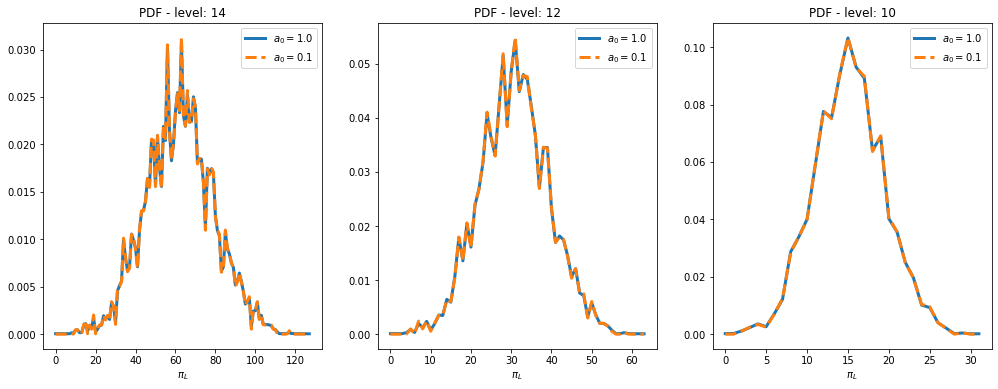

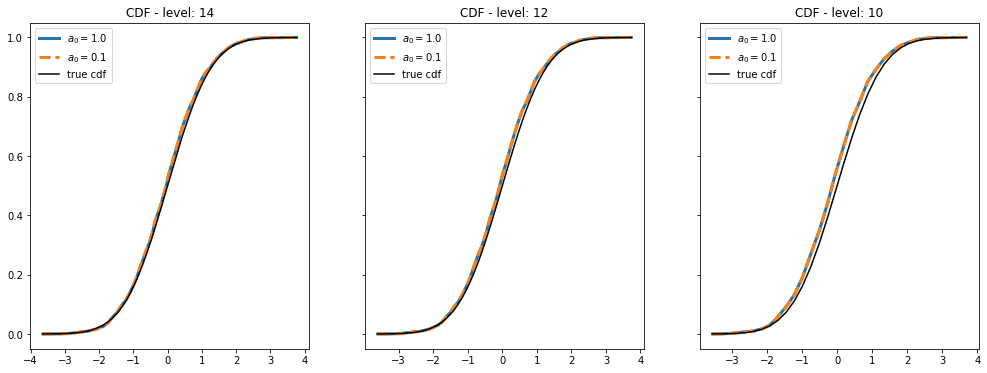

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,6))
for i, ax in enumerate(axes.flat):
    ax.set_title('PDF - level: {}'.format(2*dict_exp[i]['seg_1dim']))
    ax.plot(np.arange(dict_ret[i]['pi_map'].shape[0]), np.mean(dict_ret[i]['pi_map'], axis=(1,2)), 
            label='$a_0={}$'.format(dict_exp[i]['a_0']), linewidth=3)
    ax.plot(np.arange(dict_ret[i+3]['pi_map'].shape[0]), np.mean(dict_ret[i+3]['pi_map'], axis=(1,2)), 
        label='$a_0={}$'.format(dict_exp[i+3]['a_0']),linestyle='--', linewidth=3)
    ax.set_xlabel('$\pi_L$')
    ax.legend()
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,6), sharey=True)
for i, ax in enumerate(axes.flat):
    ax.set_title('CDF - level: {}'.format(2*dict_exp[i]['seg_1dim']))
    ax.plot(dict_ret[i]['arr_med'], np.cumsum(np.mean(dict_ret[i]['pi_map'], axis=(1,2))), 
            label='$a_0={}$'.format(dict_exp[i]['a_0']), linewidth=3)
    ax.plot(dict_ret[i+3]['arr_med'], np.cumsum(np.mean(dict_ret[i+3]['pi_map'], axis=(1,2))), 
        label='$a_0={}$'.format(dict_exp[i+3]['a_0']),linestyle='--', linewidth=3)

    cdf_emp = norm.cdf(dict_ret[i]['arr_med'], loc=0, scale=1)
    ax.plot(dict_ret[i]['arr_med'], cdf_emp, c='k', label='true cdf')
    ax.legend()

#  2D - independent

In [4]:
mn = [0, 0]
sgma = [[1, 0], [0, 1]]  # diagonal covariance
np.random.seed(0)
d_mvn_sim = pd.DataFrame(np.random.multivariate_normal(mn, sgma, 1000))

In [5]:
dict_exp = {0: {'dim':2, 'seg_1dim':5, 'a_0': 1.0, 'gamma':0.1}, 1: {'dim':2, 'seg_1dim':4, 'a_0': 1.0, 'gamma':0.1},
            2: {'dim':2, 'seg_1dim':3, 'a_0': 1.0, 'gamma':0.1}, 3: {'dim':2, 'seg_1dim':5, 'a_0': 0.1, 'gamma':0.1},
            4: {'dim':2, 'seg_1dim':4, 'a_0': 0.1, 'gamma':0.1}, 5: {'dim':2, 'seg_1dim':3, 'a_0': 0.1, 'gamma':0.1}}
dict_ret = defaultdict(dict)

n_pts = 1000
for exp in dict_exp:
    pt = PThBeta(seg_1dim=dict_exp[exp]['seg_1dim'])
    pi_map_sample, map_seg_pdist, freq = pt.pi_hBeta_sampler(d_mvn_sim, 
                                                             n_pts=n_pts, gamma=dict_exp[exp]['gamma'], 
                                                             a_0=dict_exp[exp]['a_0'], sup_01=False)
   # cumsum_y_given_x, y_given_x = pt.quantile_conditional_distribution(pi_map_sample, map_seg_pdist, np.array([0.25, 0.5, 0.75]))
    y_given_x = pt.conditional_expected(pi_map_sample, map_seg_pdist)
    dict_ret[exp]['pi_map'] = pi_map_sample
    dict_ret[exp]['map_seg_pdist'] = map_seg_pdist
#     dict_ret[exp]['cumsum_y_given_x'] = cumsum_y_given_x
    dict_ret[exp]['y_given_x'] = y_given_x
    dict_ret[exp]['arr_med'] = pd.unique(pt.arr_med[:,0])

********************
p=2, Level=10, intervals at level-L=1024
number of differet segmentations=252
Elapsed time for- set_int_coords: 12.7079 seconds
Elapsed time for- sampling loop: 167.5434 seconds
Elapsed time for- pi_map_sample: 93.7357 seconds
********************
p=2, Level=8, intervals at level-L=256
number of differet segmentations=70
Elapsed time for- set_int_coords: 1.0888 seconds
Elapsed time for- sampling loop: 11.2192 seconds
Elapsed time for- pi_map_sample: 1.7496 seconds
********************
p=2, Level=6, intervals at level-L=64
number of differet segmentations=20
Elapsed time for- set_int_coords: 0.0939 seconds
Elapsed time for- sampling loop: 1.0135 seconds
Elapsed time for- pi_map_sample: 0.3266 seconds
********************
p=2, Level=10, intervals at level-L=1024
number of differet segmentations=252
Elapsed time for- set_int_coords: 12.9616 seconds
Elapsed time for- sampling loop: 174.2179 seconds
Elapsed time for- pi_map_sample: 55.2491 seconds
********************
p

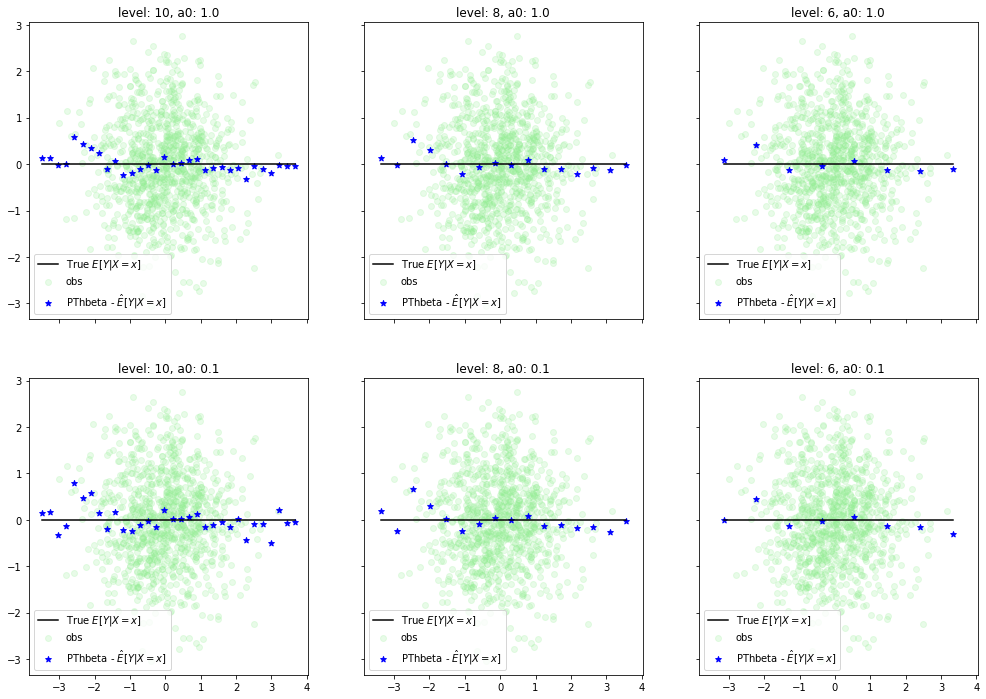

In [6]:
dict_ret[i]['y_given_x']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    ax.set_title('level: {}, a0: {}'.format(2*dict_exp[i]['seg_1dim'], dict_exp[i]['a_0']))
    ax.scatter(x=d_mvn_sim.iloc[:, 0], y=d_mvn_sim.iloc[:, 1], alpha=0.2, c='lightgreen', label='obs')
    ax.scatter(x=dict_ret[i]['arr_med'], y=dict_ret[i]['y_given_x'].loc[:,'y'], c='b', 
                  marker='*', label='PThbeta - $\hat{E}[Y|X=x]$')
    ax.plot(dict_ret[i]['arr_med'], 0 * dict_ret[i]['arr_med'], c='k', label='True $E[Y|X=x]$')

    ax.legend()

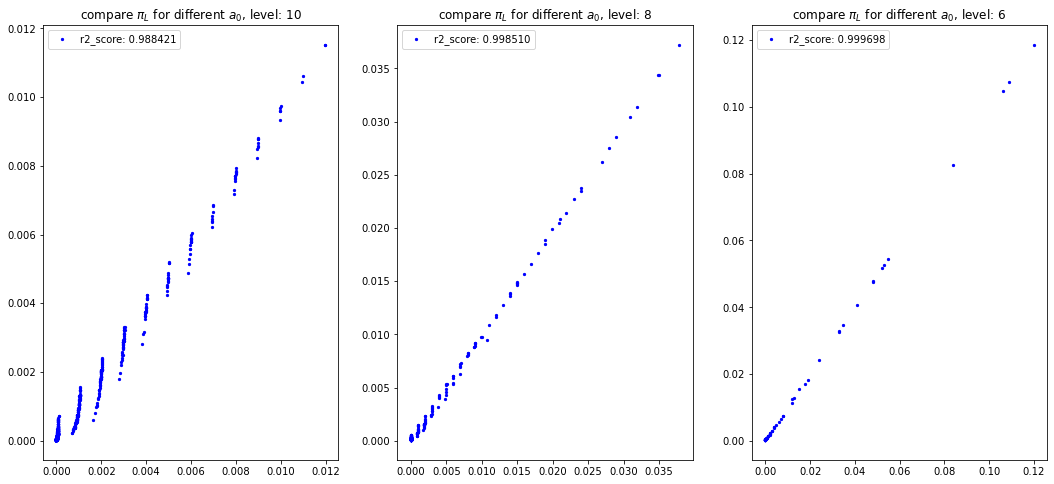

In [7]:
from sklearn.metrics import r2_score
fig, ax = plt.subplots(ncols=3, figsize=(18,8))#, sharey=True, sharex=True)
for i in range(3):
    ax[i].set_title('compare $\pi_L$ for different $a_0$, level: {}'.format(2*dict_exp[i+3]['seg_1dim']))
    ax[i].scatter(x= np.mean(dict_ret[i+3]['pi_map'], axis=(1,2)), 
                  y= np.mean(dict_ret[i]['pi_map'], axis=(1,2)), c='b', s=5)
    ax[i].legend(['r2_score: {:f}'.format(r2_score(
        np.mean(dict_ret[i+3]['pi_map'], axis=(1,2)),
        np.mean(dict_ret[i]['pi_map'], axis=(1,2))))])

# 2D - dependent

In [8]:
# sgma = [[1, 1], [1, 1]]  # diagonal covariance

mn = [0, 0]
sgma = [[1, 0.8], [0.8, 1]]  # diagonal covariance
np.random.seed(0)
d_mvn_sim = pd.DataFrame(np.random.multivariate_normal(mn, sgma, 1000))

In [9]:
dict_exp = {0: {'dim':2, 'seg_1dim':4, 'a_0': 1.0, 'gamma':0.1}, 1: {'dim':2, 'seg_1dim':4, 'a_0': 1.0, 'gamma':0.1},
            2: {'dim':2, 'seg_1dim':3, 'a_0': 1.0, 'gamma':0.1}, 3: {'dim':2, 'seg_1dim':4, 'a_0': 0.1, 'gamma':0.1},
            4: {'dim':2, 'seg_1dim':4, 'a_0': 0.1, 'gamma':0.1}, 5: {'dim':2, 'seg_1dim':3, 'a_0': 0.1, 'gamma':0.1}}
dict_ret = defaultdict(dict)

n_pts = 1000
for exp in dict_exp:
    pt = PThBeta(seg_1dim=dict_exp[exp]['seg_1dim'])
    pi_map_sample, map_seg_pdist, freq = pt.pi_hBeta_sampler(d_mvn_sim, 
                                                             n_pts=n_pts, gamma=dict_exp[exp]['gamma'], 
                                                             a_0=dict_exp[exp]['a_0'], sup_01=False)
    y_given_x = pt.conditional_expected(pi_map_sample, map_seg_pdist)
    dict_ret[exp]['pi_map'] = pi_map_sample
    dict_ret[exp]['map_seg_pdist'] = map_seg_pdist
#    cumsum_y_given_x, y_given_x = pt.quantile_conditional_distribution(pi_map_sample, map_seg_pdist, np.array([0.25, 0.5, 0.75]))
#    dict_ret[exp]['cumsum_y_given_x'] = cumsum_y_given_x
    dict_ret[exp]['y_given_x'] = y_given_x
    dict_ret[exp]['arr_med'] = pd.unique(pt.arr_med[:,0])

********************
p=2, Level=8, intervals at level-L=256
number of differet segmentations=70
Elapsed time for- set_int_coords: 0.7707 seconds
Elapsed time for- sampling loop: 10.9717 seconds
Elapsed time for- pi_map_sample: 1.6777 seconds
********************
p=2, Level=8, intervals at level-L=256
number of differet segmentations=70
Elapsed time for- set_int_coords: 1.0332 seconds
Elapsed time for- sampling loop: 10.9209 seconds
Elapsed time for- pi_map_sample: 1.7075 seconds
********************
p=2, Level=6, intervals at level-L=64
number of differet segmentations=20
Elapsed time for- set_int_coords: 0.0774 seconds
Elapsed time for- sampling loop: 0.8245 seconds
Elapsed time for- pi_map_sample: 0.2581 seconds
********************
p=2, Level=8, intervals at level-L=256
number of differet segmentations=70
Elapsed time for- set_int_coords: 0.8682 seconds
Elapsed time for- sampling loop: 12.1943 seconds
Elapsed time for- pi_map_sample: 1.7226 seconds
********************
p=2, Level=8,

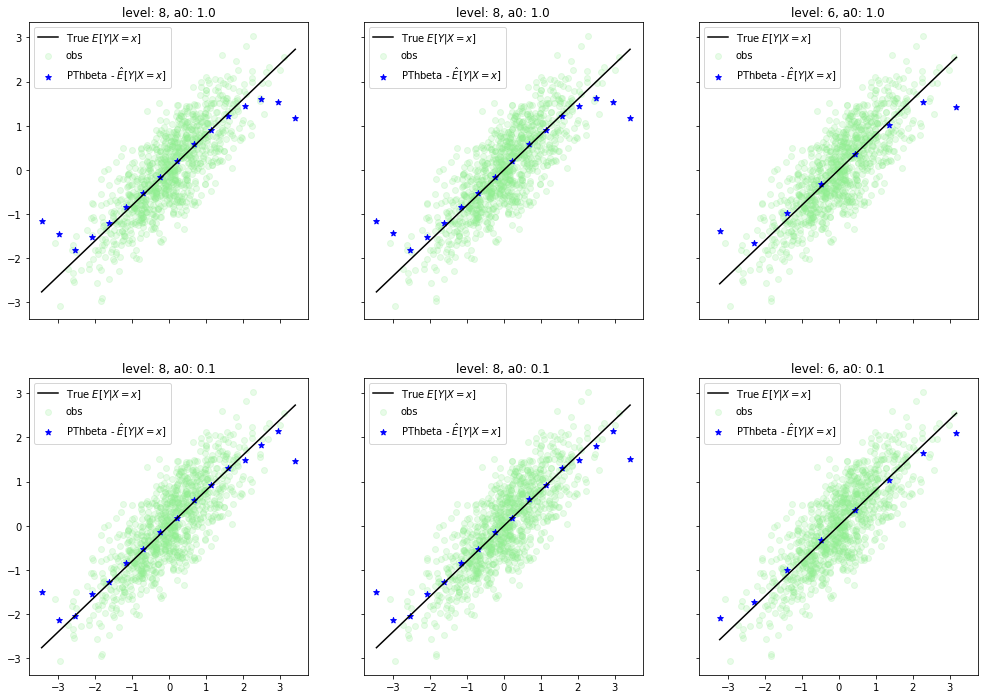

In [10]:
dict_ret[i]['y_given_x']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    ax.set_title('level: {}, a0: {}'.format(2*dict_exp[i]['seg_1dim'], dict_exp[i]['a_0']))
    ax.scatter(x=d_mvn_sim.iloc[:, 1], y=d_mvn_sim.iloc[:, 0], alpha=0.2, c='lightgreen', label='obs')
    ax.scatter(x=dict_ret[i]['arr_med'], y=dict_ret[i]['y_given_x'].loc[:,'y'], c='b', 
                  marker='*', label='PThbeta - $\hat{E}[Y|X=x]$')
    ax.plot(dict_ret[i]['arr_med'], 0.8 * dict_ret[i]['arr_med'], c='k', label='True $E[Y|X=x]$')

    ax.legend()

In [11]:
p_x = pt.marginalizing_y(pi_map_sample, map_seg_pdist)

np.sum(y_given_x['y'] * p_x['p_x'])

0.023534810917385518

# 3d dependent

In [62]:
from hBeta import PThBeta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils_func import load_database
from scipy.stats import multivariate_normal
import seaborn as sns


mn = [2, -4, 0]
sgma = [[1, 0.8, 0.2], [0.8, 1, 0.4], [0.2, 0.4, 1]]  # diagonal covariance

d_mvn_sim = pd.DataFrame(np.random.multivariate_normal(mn, sgma, 1000))


In [45]:
pd.DataFrame(sgma)

,0,1,2
0,1.0,0.8,0.2
1,0.8,1.0,0.4
2,0.2,0.4,1.0


In [65]:
dict_exp = {0: {'dim':3, 'seg_1dim':1, 'a_0': 1.0, 'gamma':0.1}, 1: {'dim':3, 'seg_1dim':2, 'a_0': 1.0, 'gamma':0.1},
            2: {'dim':3, 'seg_1dim':1, 'a_0': 0.1, 'gamma':0.1}, 3: {'dim':3, 'seg_1dim':2, 'a_0': 0.1, 'gamma':0.1}}
dict_ret = defaultdict(dict)

n_pts = 1000
for exp in dict_exp:
    pt = PThBeta(seg_1dim=dict_exp[exp]['seg_1dim'])
    pi_map_sample, map_seg_pdist, freq = pt.pi_hBeta_sampler(d_mvn_sim, 
                                                             n_pts=n_pts, gamma=dict_exp[exp]['gamma'], 
                                                             a_0=dict_exp[exp]['a_0'], sup_01=False)
    y_given_x = pt.conditional_expected(pi_map_sample, map_seg_pdist)
    dict_ret[exp]['pi_map'] = pi_map_sample
    dict_ret[exp]['map_seg_pdist'] = map_seg_pdist
#    cumsum_y_given_x, y_given_x = pt.quantile_conditional_distribution(pi_map_sample, map_seg_pdist, np.array([0.25, 0.5, 0.75]))
#    dict_ret[exp]['cumsum_y_given_x'] = cumsum_y_given_x
    dict_ret[exp]['y_given_x'] = y_given_x
    dict_ret[exp]['arr_med'] = pd.unique(pt.arr_med[:,0])
    dict_ret[exp]['p_x'] = pt.marginalizing_y(pi_map_sample, map_seg_pdist)

********************
p=3, Level=3, intervals at level-L=8
number of differet segmentations=6
Elapsed time for- set_int_coords: 0.0185 seconds
Elapsed time for- sampling loop: 0.0282 seconds
Elapsed time for- pi_map_sample: 0.0509 seconds
********************
p=3, Level=6, intervals at level-L=64
number of differet segmentations=90
Elapsed time for- set_int_coords: 0.3881 seconds
Elapsed time for- sampling loop: 3.6911 seconds
Elapsed time for- pi_map_sample: 1.2146 seconds
********************
p=3, Level=3, intervals at level-L=8
number of differet segmentations=6
Elapsed time for- set_int_coords: 0.0168 seconds
Elapsed time for- sampling loop: 0.0347 seconds
Elapsed time for- pi_map_sample: 0.0582 seconds
********************
p=3, Level=6, intervals at level-L=64
number of differet segmentations=90
Elapsed time for- set_int_coords: 0.3257 seconds
Elapsed time for- sampling loop: 3.7501 seconds
Elapsed time for- pi_map_sample: 1.2957 seconds


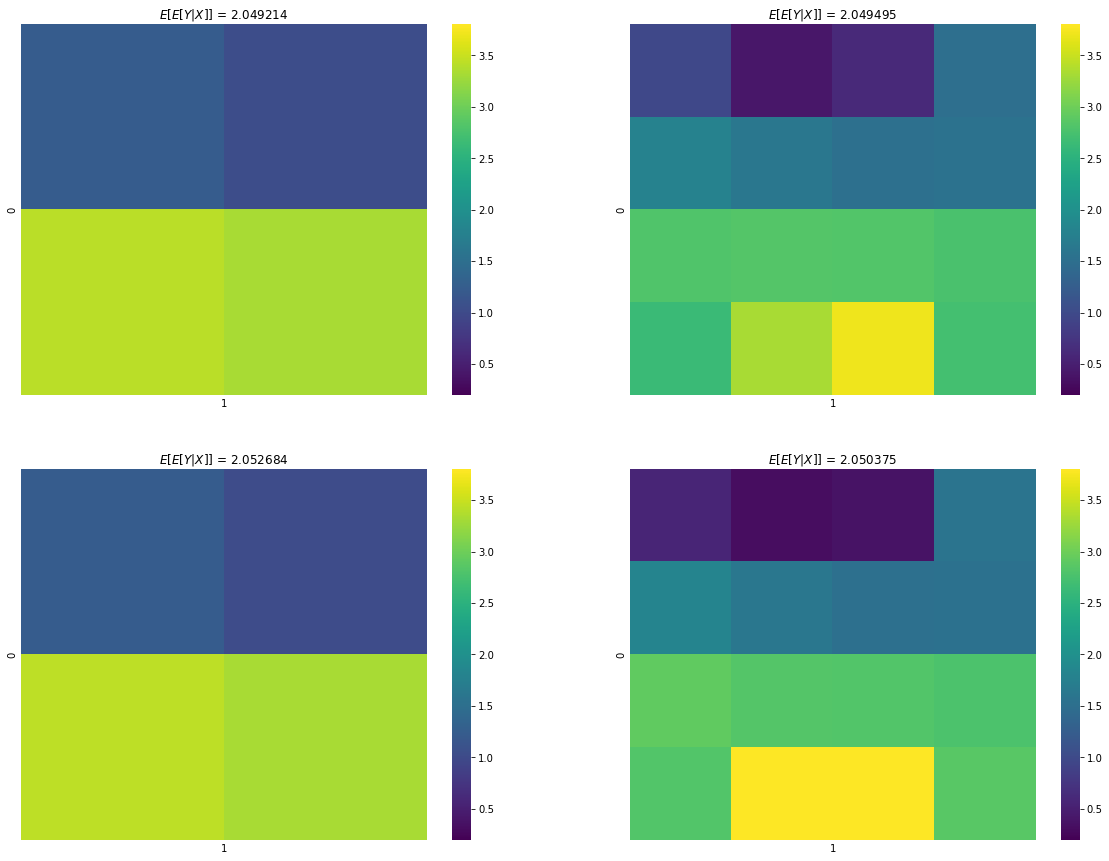

In [73]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,15))
for i, ax in enumerate(axes.flat):
    df_heat = dict_ret[i]['y_given_x'].pivot(0, 1, "y")
    sns.heatmap(df_heat, ax=ax, vmin=0.2, vmax=3.8, xticklabels=False, yticklabels=False, cmap=plt.get_cmap('viridis'))
    ax.set_title('$E[E[Y|X]]$ = {:f}'.format(np.sum(dict_ret[i]['y_given_x']['y'] * dict_ret[i]['p_x']['p_x'])))

$(E[Y|X=x,A=1]-E[Y|X=x,A=0])*p(X=x|A=1)$

In [28]:
p_x = pt.marginalizing_y(pi_map_sample, map_seg_pdist)

np.sum(y_given_x['y'] * p_x['p_x'])

1.9954979123594834

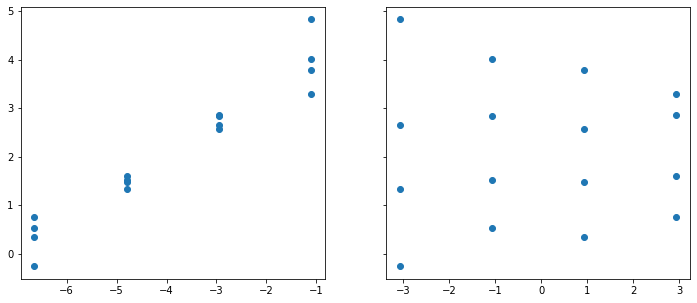

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
ax[0].scatter(dict_ret[exp]['y_given_x'].iloc[:,1], dict_ret[exp]['y_given_x'].iloc[:,0])
ax[1].scatter(dict_ret[exp]['y_given_x'].iloc[:,2], dict_ret[exp]['y_given_x'].iloc[:,0])

# 4d

In [52]:
from hBeta import PThBeta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils_func import load_database
from scipy.stats import multivariate_normal
import seaborn as sns


mn = [2, -4, 0, 1]
sgma = [[1, 0.8, 0.2, 0.4], [0.8, 1, 0.4, 0], [0.2, 0.4, 1, 0], [0.4, 0, 0, 1]]  # diagonal covariance

d_mvn_sim = pd.DataFrame(np.random.multivariate_normal(mn, sgma, 1000))
pd.DataFrame(sgma)

,0,1,2,3
0,1.0,0.8,0.2,0.4
1,0.8,1.0,0.4,0.0
2,0.2,0.4,1.0,0.0
3,0.4,0.0,0.0,1.0


In [60]:
dict_exp = {0: {'dim':4, 'seg_1dim':1, 'a_0': 1.0, 'gamma':0.1}}
dict_ret = defaultdict(dict)

n_pts = 1000
for exp in dict_exp:
    pt = PThBeta(seg_1dim=dict_exp[exp]['seg_1dim'])
    pi_map_sample, map_seg_pdist, freq = pt.pi_hBeta_sampler(d_mvn_sim, 
                                                             n_pts=n_pts, gamma=dict_exp[exp]['gamma'], 
                                                             a_0=dict_exp[exp]['a_0'], sup_01=False)
    y_given_x = pt.conditional_expected(pi_map_sample, map_seg_pdist)
    dict_ret[exp]['pi_map'] = pi_map_sample
    dict_ret[exp]['map_seg_pdist'] = map_seg_pdist
#    cumsum_y_given_x, y_given_x = pt.quantile_conditional_distribution(pi_map_sample, map_seg_pdist, np.array([0.25, 0.5, 0.75]))
#    dict_ret[exp]['cumsum_y_given_x'] = cumsum_y_given_x
    dict_ret[exp]['y_given_x'] = y_given_x
    dict_ret[exp]['arr_med'] = pd.unique(pt.arr_med[:,0])
    dict_ret[exp]['p_x'] = pt.marginalizing_y(pi_map_sample, map_seg_pdist)

********************
p=4, Level=4, intervals at level-L=16
number of differet segmentations=24
Elapsed time for- set_int_coords: 0.0329 seconds
Elapsed time for- sampling loop: 0.2379 seconds
Elapsed time for- pi_map_sample: 0.2204 seconds


In [61]:
np.sum(dict_ret[0]['y_given_x']['y'] * dict_ret[0]['p_x']['p_x'])

1.9749775637460982

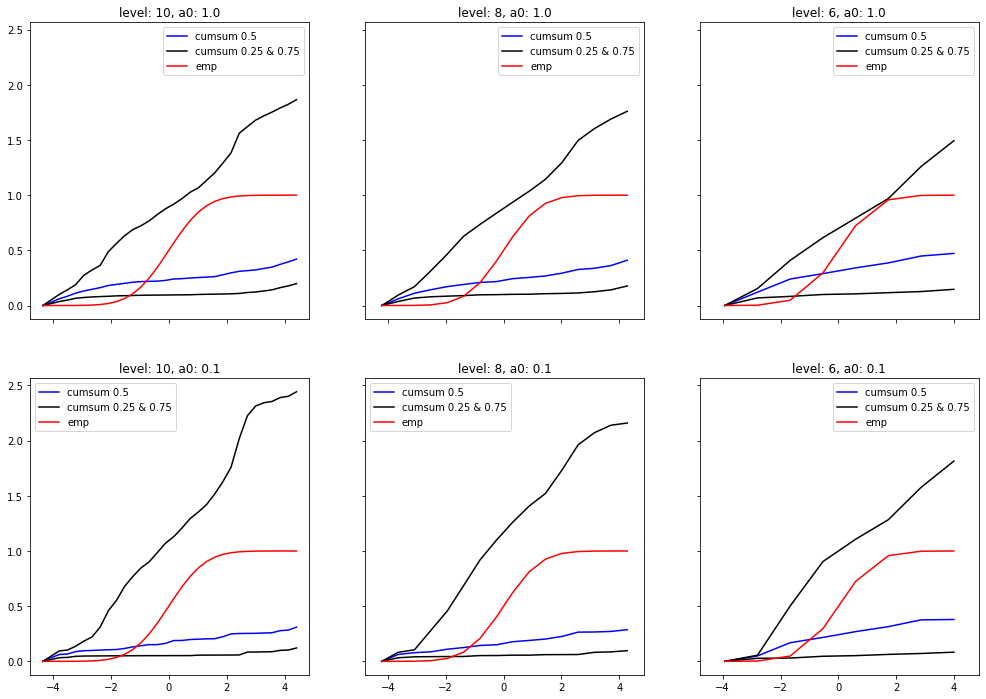

In [6]:
from scipy.stats import norm
y_emp = d_mvn_sim.sort_values(by=0).iloc[:, 0]
cdf_emp = norm.cdf(y_emp, loc=0, scale=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    ax.plot(dict_ret[i]['arr_med'], dict_ret[i]['cumsum_y_given_x'].iloc[1,:], c='b', label='cumsum 0.5')
    ax.plot(dict_ret[i]['arr_med'], dict_ret[i]['cumsum_y_given_x'].iloc[0,:], c='k', label='cumsum 0.25 & 0.75')
    ax.plot(dict_ret[i]['arr_med'], dict_ret[i]['cumsum_y_given_x'].iloc[2,:], c='k')
    
    cdf_emp = norm.cdf(dict_ret[i]['arr_med'], loc=0, scale=1)
    ax.plot(dict_ret[i]['arr_med'], cdf_emp, c='r', label='emp')
    ax.set_title('level: {}, a0: {}'.format(2*dict_exp[i]['seg_1dim'], dict_exp[i]['a_0']))
    ax.legend()

In [11]:
dict_exp = {0: {'dim':2, 'seg_1dim':2, 'a_0': 1.0, 'gamma':0.1}, 1: {'dim':2, 'seg_1dim':2, 'a_0': 1.0, 'gamma':0.1}}
dict_ret = defaultdict(dict)

n_pts = 1000
for exp in dict_exp:
    pt = PThBeta(seg_1dim=dict_exp[exp]['seg_1dim'])
    pi_map_sample, map_seg_pdist, freq = pt.pi_hBeta_sampler(d_mvn_sim, 
                                                             n_pts=n_pts, gamma=dict_exp[exp]['gamma'], 
                                                             a_0=dict_exp[exp]['a_0'], sup_01=False)
    #cumsum_y_given_x, y_given_x = pt.quantile_conditional_distribution(pi_map_sample, map_seg_pdist, np.array([0.25, 0.5, 0.75]))
    y_given_x = pt.conditional_expected(pi_map_sample, map_seg_pdist)
    dict_ret[exp]['pi_map'] = pi_map_sample
    dict_ret[exp]['map_seg_pdist'] = map_seg_pdist
#     dict_ret[exp]['cumsum_y_given_x'] = cumsum_y_given_x
    dict_ret[exp]['y_given_x'] = y_given_x
    dict_ret[exp]['arr_med'] = pd.unique(pt.arr_med[:,0])

********************
p=2, Level=4, intervals at level-L=16
number of differet segmentations=6
Elapsed time for- set_int_coords: 0.0195 seconds
Elapsed time for- sampling loop: 0.0604 seconds
Elapsed time for- pi_map_sample: 0.0546 seconds
********************
p=2, Level=4, intervals at level-L=16
number of differet segmentations=6
Elapsed time for- set_int_coords: 0.0199 seconds
Elapsed time for- sampling loop: 0.0594 seconds
Elapsed time for- pi_map_sample: 0.1017 seconds


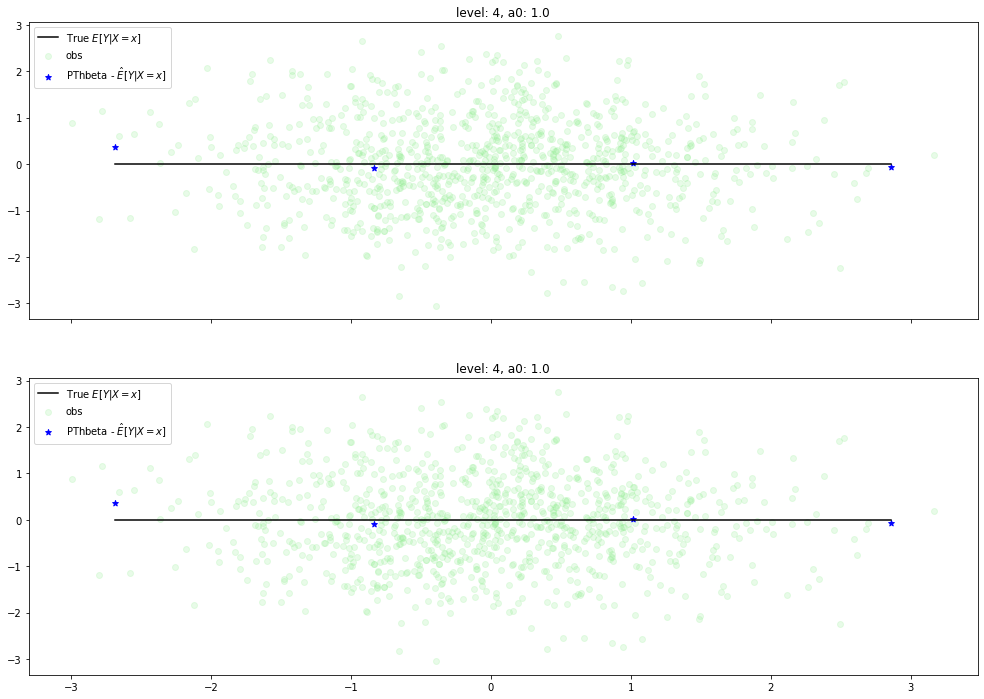

In [12]:
# dict_ret[i]['y_given_x']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(17,12), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    ax.set_title('level: {}, a0: {}'.format(2*dict_exp[i]['seg_1dim'], dict_exp[i]['a_0']))
    ax.scatter(x=d_mvn_sim.iloc[:, 0], y=d_mvn_sim.iloc[:, 1], alpha=0.2, c='lightgreen', label='obs')
    ax.scatter(x=dict_ret[i]['arr_med'], y=dict_ret[i]['y_given_x'].loc[:,'y'], c='b', 
                  marker='*', label='PThbeta - $\hat{E}[Y|X=x]$')
    ax.plot(dict_ret[i]['arr_med'], 0 * dict_ret[i]['arr_med'], c='k', label='True $E[Y|X=x]$')

    ax.legend()